## Import Module

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import entropy as scipy_entropy
from scipy.optimize import linear_sum_assignment as linear_assignment
from scipy.stats import entropy
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## 讀取檔案

In [2]:
df = pd.read_csv('sizes3.csv')
X = df.drop('class', axis=1)
y = df['class']

## 正規化

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

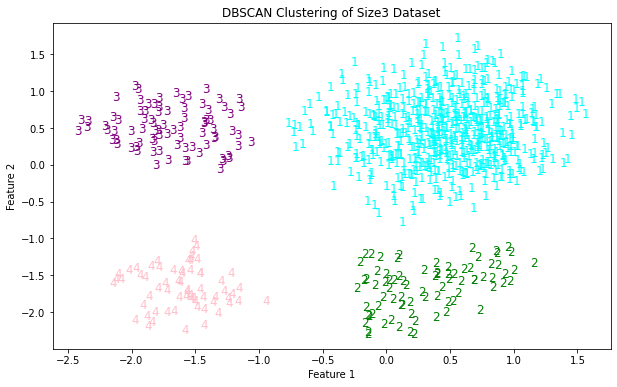

Clustering Elapsed Time: 1.88 s
SSE:  295.6552010849835
Accuracy:  0.879
Entropy:  1.2308178957541773


In [4]:
# 開始計時
start_time = time.time()

# DBSCAN 群聚
dbscan = DBSCAN(eps=0.3, min_samples=17)
# 執行 DBSCAN 群聚
dbscan_labels = dbscan.fit_predict(df.drop('class', axis=1))

# 函數計算 SSE, Accuracy 和 Entropy
def map_labels(true_labels, pred_labels):
    label_map = {}
    for pred_label in np.unique(pred_labels):
        if pred_label == -1:
            continue
        true_label = Counter(true_labels[pred_labels == pred_label]).most_common(1)[0][0]
        label_map[pred_label] = true_label
    return [label_map[label] if label in label_map else -1 for label in pred_labels]

def compute_metrics(X, y, labels):
    
    # entropy
    ent = entropy([np.mean(labels == k) for k in set(labels) if k != -1], base=2)

    # SSE
    sse = 0
    for label in set(labels):
        if label == -1:
            continue
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            centroid = np.mean(cluster_points, axis=0)
            sse += np.sum((cluster_points - centroid) ** 2)

    # Accuracy
    mapped_labels = map_labels(y, labels)
    accuracy = accuracy_score(y, mapped_labels)

    return sse, accuracy, ent

# 繪製結果的函數
def plot_clusters(X_scaled, labels, title):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    colors = ['cyan', 'green', 'purple', 'pink']  # 定義顏色
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_points = X_scaled[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, label=f'Cluster {i+1}', color=colors[i], alpha=0.001)
        for j, (x, y) in enumerate(cluster_points): 
            plt.text(x, y, str(i+1), color=colors[i], fontsize=12, ha='center', va='center')  # 在每個點的位置添加數字
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 分四群的 DBSCAN 參數
eps_min_samples_combinations = [(0.3, 17)]

# 計算並顯示圖表
for eps, min_samples in eps_min_samples_combinations:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    sse, accuracy, ent = compute_metrics(X_scaled, y, labels)
    plot_clusters(X_scaled, labels, f'DBSCAN Clustering of Size3 Dataset')

# 停止計時
end_time = time.time()

# 計算時間
elapsed_time = end_time - start_time

print(f"Clustering Elapsed Time: {elapsed_time:.2f} s")
print("SSE: ", sse)
print("Accuracy: ", accuracy)
print("Entropy: ", ent)